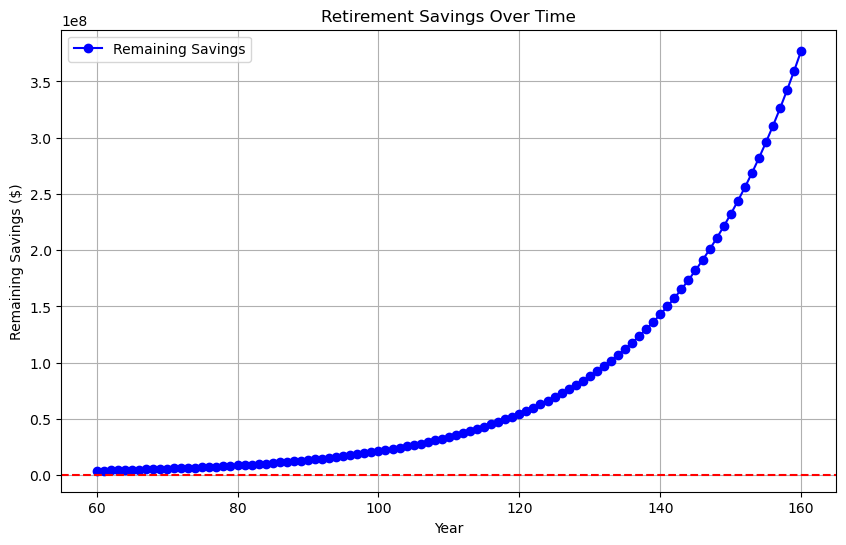

In [ ]:
import tkinter as tk
from tkinter import ttk
from math import pow
import matplotlib.pyplot as plt

# Retirement calculator function
def calculate_retirement():
    try:
        # Get user inputs
        current_age = int(current_age_entry.get())
        retirement_age = int(retirement_age_entry.get())
        current_savings = float(current_savings_entry.get())
        annual_contribution = float(annual_contribution_entry.get())
        pre_retirement_investment_rate = float(investment_rate_entry.get()) / 100  # Convert to decimal
        inflation_rate = float(inflation_rate_entry.get()) / 100  # Convert to decimal
        annual_expenses_during_retirement = float(annual_expenses_entry.get())  # Annual expenses during retirement
        social_security_income = float(social_security_entry.get())  # Social Security / Pension Income
        post_retirement_investment_rate = float(post_retirement_investment_rate_entry.get()) / 100  # Post-retirement rate

        # Calculate years to retirement
        years_to_retirement = retirement_age - current_age

        # Future value of current savings
        future_savings = current_savings * pow(1 + pre_retirement_investment_rate, years_to_retirement)

        # Future value of annual contributions
        future_contributions = annual_contribution * ((pow(1 + pre_retirement_investment_rate, years_to_retirement) - 1) / pre_retirement_investment_rate)

        # Total future savings at retirement
        total_future_savings = future_savings + future_contributions

        # Calculate inflation-adjusted annual expenses during retirement
        future_annual_expenses = annual_expenses_during_retirement * pow(1 + inflation_rate, years_to_retirement)

        # Total net income from Social Security/Pension
        total_net_income = social_security_income * pow(1 + inflation_rate, years_to_retirement)

        # Calculate total annual income required from savings
        total_annual_income_needed = future_annual_expenses - total_net_income

        # Display the results
        result_label.config(text=f"Future Savings at Retirement: ${total_future_savings:,.2f}\n"
                                f"Inflation-Adjusted Annual Expenses During Retirement: ${future_annual_expenses:,.2f}\n"
                                f"Social Security / Pension Income (Adjusted): ${total_net_income:,.2f}\n"
                                f"Total Annual Income Needed from Savings: ${total_annual_income_needed:,.2f}")

        # Retirement income lasts until savings run out (showing balance every year)
        remaining_balance = total_future_savings
        years = list(range(retirement_age, retirement_age + 101))  # Simulating for 100 years
        balances = []

        # Loop to calculate remaining balance year by year during retirement
        for year in years:
            remaining_balance *= (1 + post_retirement_investment_rate)  # Apply post-retirement investment return
            remaining_balance -= total_annual_income_needed  # Withdraw expenses
            if remaining_balance <= 0:
                break
            balances.append(remaining_balance)

        # Plot the retirement savings balance over time
        plt.figure(figsize=(10, 6))
        plt.plot(years[:len(balances)], balances, marker='o', color='b', label="Remaining Savings")
        plt.title("Retirement Savings Over Time")
        plt.xlabel("Year")
        plt.ylabel("Remaining Savings ($)")
        plt.grid(True)
        plt.axhline(0, color='r', linestyle='--')  # Add a line at zero to show when funds run out
        plt.legend()
        plt.show()
        
    except ValueError:
        result_label.config(text="Please enter valid values for all fields.")

# Create the main window
root = tk.Tk()
root.title("Retirement Calculator")

# Create the input fields
tk.Label(root, text="Current Age:").grid(row=0, column=0, sticky="w", padx=10, pady=5)
current_age_entry = ttk.Entry(root)
current_age_entry.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Retirement Age:").grid(row=1, column=0, sticky="w", padx=10, pady=5)
retirement_age_entry = ttk.Entry(root)
retirement_age_entry.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Current Savings ($):").grid(row=2, column=0, sticky="w", padx=10, pady=5)
current_savings_entry = ttk.Entry(root)
current_savings_entry.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Annual Contribution ($):").grid(row=3, column=0, sticky="w", padx=10, pady=5)
annual_contribution_entry = ttk.Entry(root)
annual_contribution_entry.grid(row=3, column=1, padx=10, pady=5)

tk.Label(root, text="Pre-Retirement Investment Return Rate (%):").grid(row=4, column=0, sticky="w", padx=10, pady=5)
investment_rate_entry = ttk.Entry(root)
investment_rate_entry.grid(row=4, column=1, padx=10, pady=5)

tk.Label(root, text="Annual Inflation Rate (%):").grid(row=5, column=0, sticky="w", padx=10, pady=5)
inflation_rate_entry = ttk.Entry(root)
inflation_rate_entry.grid(row=5, column=1, padx=10, pady=5)

tk.Label(root, text="Annual Expenses During Retirement ($):").grid(row=6, column=0, sticky="w", padx=10, pady=5)
annual_expenses_entry = ttk.Entry(root)
annual_expenses_entry.grid(row=6, column=1, padx=10, pady=5)

tk.Label(root, text="Annual Social Security / Pension Income ($):").grid(row=7, column=0, sticky="w", padx=10, pady=5)
social_security_entry = ttk.Entry(root)
social_security_entry.grid(row=7, column=1, padx=10, pady=5)

tk.Label(root, text="Post-Retirement Investment Return Rate (%):").grid(row=8, column=0, sticky="w", padx=10, pady=5)
post_retirement_investment_rate_entry = ttk.Entry(root)
post_retirement_investment_rate_entry.grid(row=8, column=1, padx=10, pady=5)

# Create the calculate button
calculate_button = ttk.Button(root, text="Calculate", command=calculate_retirement)
calculate_button.grid(row=9, column=0, columnspan=2, pady=20)

# Create the result label
result_label = tk.Label(root, text="", justify="left")
result_label.grid(row=10, column=0, columnspan=2, pady=10)

# Run the main loop
root.mainloop()
